In [1]:
##                        DailyRate Vs DistanceFromHome (Clustering algorithum)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import seaborn as sns
data = pd.read_csv('HR_Employee_Attrition_Data.csv')
data = data[data.Department == 'Research & Development']
data_set = data[['Age','DailyRate','DistanceFromHome']]
data_set
data_set1 =data_set
data_set

,Age,DailyRate,DistanceFromHome
1,49,279,8
2,37,1373,2
3,33,1392,3
4,27,591,2
5,32,1005,2
...,...,...,...
2933,31,325,5
2935,36,884,23
2936,39,613,6
2937,27,155,4


# Cross validation for null values present in data

In [2]:
data_set.isnull().sum()

Age                 0
DailyRate           0
DistanceFromHome    0
dtype: int64

In [5]:
data_set.describe()

,Age,DailyRate,DistanceFromHome
count,1922.000000,1922.000000,1922.000000
mean,37.042664,806.851197,9.144641
std,9.176575,402.408552,8.119930
min,18.000000,102.000000,1.000000
25%,30.000000,469.000000,2.000000
50%,36.000000,810.000000,7.000000
75%,43.000000,1153.000000,14.000000
max,60.000000,1496.000000,29.000000


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 1 to 2939
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1922 non-null   int64
 1   DailyRate         1922 non-null   int64
 2   DistanceFromHome  1922 non-null   int64
dtypes: int64(3)
memory usage: 60.1 KB


In [7]:
scelar = 

SyntaxError: invalid syntax (<ipython-input-7-481d8ae4cd85>, line 1)

# Scaling the data

In [5]:
scaler = MinMaxScaler()
scaler.fit(data_set[['DailyRate']])
data_set['DailyRate'] = scaler.transform(data_set[['DailyRate']])
scaler.fit(data_set[['Age']])
data_set['Age'] = scaler.transform(data_set[['Age']])
scaler.fit(data_set[['DistanceFromHome']])
data_set['DistanceFromHome'] = scaler.transform(data_set[['DistanceFromHome']])

In [6]:
data_set

,Age,DailyRate,DistanceFromHome
1,0.738095,0.126973,0.250000
2,0.452381,0.911765,0.035714
3,0.357143,0.925395,0.071429
4,0.214286,0.350789,0.035714
5,0.333333,0.647776,0.035714
...,...,...,...
2933,0.309524,0.159971,0.142857
2935,0.428571,0.560976,0.785714
2936,0.500000,0.366571,0.178571
2937,0.214286,0.038020,0.107143


# Scatter plot digaragam

In [ ]:
plt.scatter(data_set['DailyRate'],data_set['DistanceFromHome'])

# Define K mean and sse values

In [11]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data_set[['DailyRate','DistanceFromHome']])
    sse.append(km.inertia_)

In [12]:
sse

[311199265.23204994,
 76299867.52275723,
 36015754.6761173,
 19077198.80500297,
 12762623.502622925,
 8522439.28937139,
 6631795.603810452,
 5069421.996639915,
 3684791.987564441]

# L bow technique

Text(0, 0.5, 'Sum of Square Error')

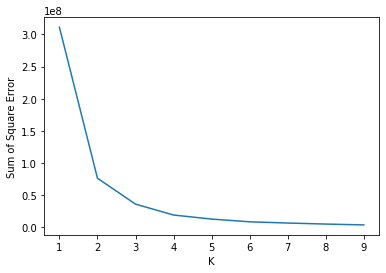

In [4]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of Square Error')

In [17]:
km = KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
km.cluster_centers

AttributeError: 'KMeans' object has no attribute 'cluster_centers'

In [19]:
y_predited = km.fit_predict(data_set[['DailyRate','DistanceFromHome']])
y_predited

array([1, 0, 0, ..., 1, 1, 1])

In [20]:
data_set1['Cluster'] = y_predited
data_set1

,Age,DailyRate,DistanceFromHome,Cluster
1,49,279,8,1
2,37,1373,2,0
3,33,1392,3,0
4,27,591,2,1
5,32,1005,2,0
...,...,...,...,...
2933,31,325,5,1
2935,36,884,23,0
2936,39,613,6,1
2937,27,155,4,1


No handles with labels found to put in legend.


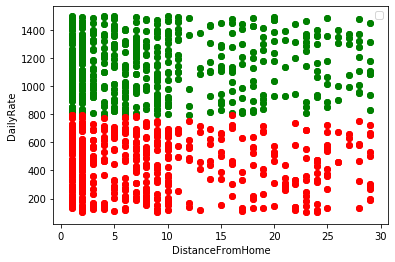

In [23]:
df1 = data_set1[data_set1.Cluster == 0]
df2 = data_set1[data_set1.Cluster == 1]
df3 = data_set1[data_set1.Cluster == 2]

plt.scatter(df1['DistanceFromHome'],df1['DailyRate'],color = 'green')
plt.scatter(df2['DistanceFromHome'],df2['DailyRate'],color = 'red')
plt.scatter(df3['DistanceFromHome'],df3['DailyRate'],color = 'black')

# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '*',label = 'centroid')

plt.xlabel('DistanceFromHome')
plt.ylabel('DailyRate')
plt.legend()

#                    PerformanceRating vs PercentSalaryHike (Linear regression)

In [6]:
data3 = pd.read_csv('HR_Employee_Attrition_Data.csv')
data2 = data3[data3.Department == 'Research & Development']
data2 = data2[['PerformanceRating','PercentSalaryHike']]
data2

,PerformanceRating,PercentSalaryHike
1,2,23
2,1,15
3,1,11
4,1,12
5,1,13
...,...,...
2933,1,19
2935,1,17
2936,1,15
2937,2,20


In [ ]:
    #MachineLearning #PythonMachineLearning #MachineLearningTutorial

#Verify the data whether it has null values or not

In [ ]:
data2.isnull().sum()

In [ ]:
data2.describe()

In [ ]:
data2.info()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Text(0.5, 0, 'Rating')

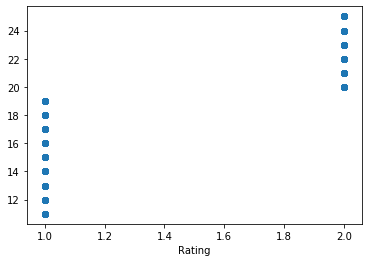

In [15]:
%matplotlib inline
plt.scatter(data2.PerformanceRating,data2.PercentSalaryHike)
plt.xlabel('High')
plt.xlabel('Rating')
# plt.plot(data2.PerformanceRating,reg.predict[['PerformanceRating','PercentSalaryHike']],color = 'red') #If linear it plot line

In [8]:
reg = linear_model.LinearRegression()
reg.fit(data2[['PerformanceRating']],data2[['PercentSalaryHike']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.predict
#it not predit because it have no linear reltion ship

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [10]:
reg.coef_

array([[7.87095079]])

In [11]:
reg.intercept_

array([6.14271381])

In [12]:
# y = mx+b
y = 7.84634209*3-9.53581083
y

14.00321544

In [ ]:
If u want to know any predition with respect to x axis
new = reg.predict(dataframe)
dataframe['name'] = new

#         Linear regression _ Multivariable

In [2]:
data4 = pd.read_csv('HR_Employee_Attrition_Data.csv')
data4

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data4 = data4[['TotalWorkingYears','PerformanceRating','RelationshipSatisfaction','PercentSalaryHike']]
data4

,TotalWorkingYears,PerformanceRating,RelationshipSatisfaction,PercentSalaryHike
0,8,1,1,11
1,10,2,4,23
2,7,1,2,15
3,8,1,3,11
4,6,1,4,12
...,...,...,...,...
2935,17,1,3,17
2936,9,1,1,15
2937,6,2,2,20
2938,17,1,4,14


In [4]:
data4.isnull().sum()

TotalWorkingYears           0
PerformanceRating           0
RelationshipSatisfaction    0
PercentSalaryHike           0
dtype: int64

In [5]:
data4.describe()

,TotalWorkingYears,PerformanceRating,RelationshipSatisfaction,PercentSalaryHike
count,2940.000000,2940.000000,2940.000000,2940.000000
mean,11.279592,1.153741,2.712245,15.209524
std,7.779458,0.360762,1.081025,3.659315
min,0.000000,1.000000,1.000000,11.000000
25%,6.000000,1.000000,2.000000,12.000000
50%,10.000000,1.000000,3.000000,14.000000
75%,15.000000,1.000000,4.000000,18.000000
max,40.000000,2.000000,4.000000,25.000000


In [6]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TotalWorkingYears         2940 non-null   int64
 1   PerformanceRating         2940 non-null   int64
 2   RelationshipSatisfaction  2940 non-null   int64
 3   PercentSalaryHike         2940 non-null   int64
dtypes: int64(4)
memory usage: 92.0 KB


Text(0, 0.5, 'PercentSalaryHike')

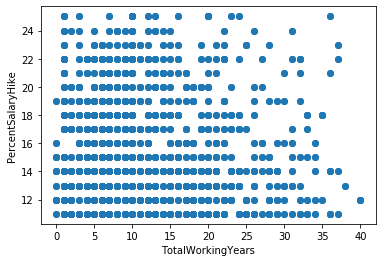

In [23]:
plt.scatter(data4.TotalWorkingYears,data4.PercentSalaryHike)
plt.xlabel('TotalWorkingYears')
plt.ylabel('PercentSalaryHike')

In [ ]:
plt.scatter(data4.RelationshipSatisfaction,data4.PercentSalaryHike)
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('PercentSalaryHike')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [24]:
reg = linear_model.LinearRegression()
reg.fit(data4[['TotalWorkingYears','PerformanceRating','RelationshipSatisfaction']],data4[['PercentSalaryHike']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [25]:
reg.predict([[22,4,4]])

array([[37.33656404]])

In [ ]:
# y = co1*TotalWorkingYears + co2*PerformanceRating + co3*RelationshipSatisfaction + intercept

# Logestic regression(Binary value predition)

In [7]:
lgdata = pd.read_csv('HR_Employee_Attrition_Data.csv')
lgdata = lgdata[['JobInvolvement','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','Attrition']]
lgdata

,JobInvolvement,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,Attrition
0,3,11,1,1,8,Yes
1,2,23,2,4,10,No
2,2,15,1,2,7,Yes
3,3,11,1,3,8,No
4,3,12,1,4,6,No
...,...,...,...,...,...,...
2935,4,17,1,3,17,No
2936,2,15,1,1,9,No
2937,4,20,2,2,6,No
2938,2,14,1,4,17,No


In [8]:
lgdata['Attrition'] = lgdata['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
lgdata

,JobInvolvement,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,Attrition
0,3,11,1,1,8,1
1,2,23,2,4,10,0
2,2,15,1,2,7,1
3,3,11,1,3,8,0
4,3,12,1,4,6,0
...,...,...,...,...,...,...
2935,4,17,1,3,17,0
2936,2,15,1,1,9,0
2937,4,20,2,2,6,0
2938,2,14,1,4,17,0


In [9]:
lgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   JobInvolvement            2940 non-null   int64
 1   PercentSalaryHike         2940 non-null   int64
 2   PerformanceRating         2940 non-null   int64
 3   RelationshipSatisfaction  2940 non-null   int64
 4   TotalWorkingYears         2940 non-null   int64
 5   Attrition                 2940 non-null   int64
dtypes: int64(6)
memory usage: 137.9 KB


In [29]:
lgdata['Attrition'].unique()

array([1, 0], dtype=int64)

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
lgdata

,JobInvolvement,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,Attrition
0,3,11,1,1,8,1
1,2,23,2,4,10,0
2,2,15,1,2,7,1
3,3,11,1,3,8,0
4,3,12,1,4,6,0
...,...,...,...,...,...,...
2935,4,17,1,3,17,0
2936,2,15,1,1,9,0
2937,4,20,2,2,6,0
2938,2,14,1,4,17,0


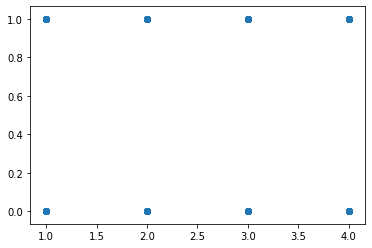

In [12]:
plt.scatter(lgdata.JobInvolvement,lgdata.Attrition)

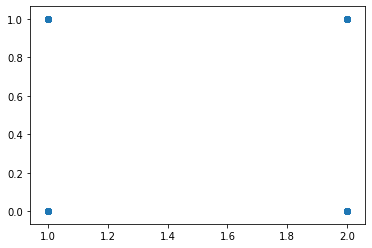

In [13]:
plt.scatter(lgdata.PerformanceRating,lgdata.Attrition)

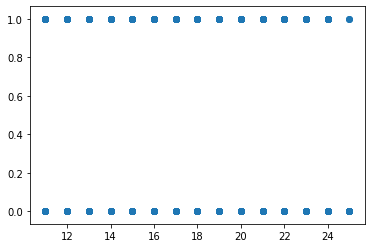

In [36]:
plt.scatter(lgdata.PercentSalaryHike,lgdata.Attrition)

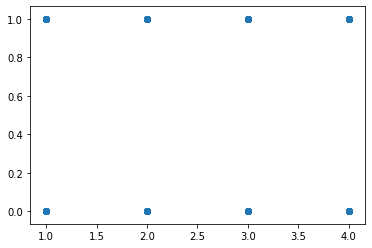

In [14]:
plt.scatter(lgdata.RelationshipSatisfaction,lgdata.Attrition)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = lgdata[['JobInvolvement','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears']]
y = lgdata.Attrition
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


In [40]:
y_train

1750    0
372     0
2301    1
1926    0
923     0
       ..
141     0
2183    0
1369    1
1767    0
1690    0
Name: Attrition, Length: 2352, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
logreg.score(X_test,y_test)

0.8503401360544217

In [45]:
logreg.predict_log_proba(X_test)

array([[-0.22603329, -1.59796175],
       [-0.07998172, -2.56568154],
       [-0.14245962, -2.01908101],
       ...,
       [-0.16734051, -1.87022832],
       [-0.13764942, -2.05108059],
       [-0.13806399, -2.04827592]])

In [47]:
logreg.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
bb = pd.DataFrame(logreg.predict(X_train))

In [19]:
train = X_train

In [23]:
train['Predition'] = bb

In [24]:
train.Predition.unique()

array([ 0., nan,  1.])

# Performance & Accuracy

In [52]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, logreg.predict(X_test))
cnf_matrix

array([[499,   0],
       [ 88,   1]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

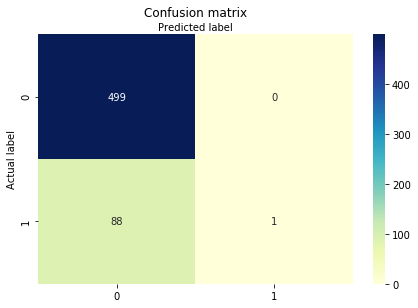

In [53]:

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()




In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, logreg.predict(X_test)))
print("Precision:",metrics.precision_score(y_test, logreg.predict(X_test)))
print("Recall:",metrics.recall_score(y_test, logreg.predict(X_test))) #(tp / (tp + fn))

Accuracy: 0.8503401360544217
Precision: 1.0
Recall: 0.011235955056179775


#                       Decision tree algorithum

In [3]:
det = pd.read_csv('HR_Employee_Attrition_Data.csv')
det=det[['Department','EducationField','JobRole','MonthlyIncome']]
det

,Department,EducationField,JobRole,MonthlyIncome
0,Sales,Life Sciences,Sales Executive,5993
1,Research & Development,Life Sciences,Research Scientist,5130
2,Research & Development,Other,Laboratory Technician,2090
3,Research & Development,Life Sciences,Research Scientist,2909
4,Research & Development,Medical,Laboratory Technician,3468
...,...,...,...,...
2935,Research & Development,Medical,Laboratory Technician,2571
2936,Research & Development,Medical,Healthcare Representative,9991
2937,Research & Development,Life Sciences,Manufacturing Director,6142
2938,Sales,Medical,Sales Executive,5390


In [4]:
det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Department      2940 non-null   object
 1   EducationField  2940 non-null   object
 2   JobRole         2940 non-null   object
 3   MonthlyIncome   2940 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 92.0+ KB


In [5]:
det['MonthlyIncome'] = det['MonthlyIncome'].apply(lambda x: 0 if x>=6000 else 1)

In [6]:
det

,Department,EducationField,JobRole,MonthlyIncome
0,Sales,Life Sciences,Sales Executive,1
1,Research & Development,Life Sciences,Research Scientist,1
2,Research & Development,Other,Laboratory Technician,1
3,Research & Development,Life Sciences,Research Scientist,1
4,Research & Development,Medical,Laboratory Technician,1
...,...,...,...,...
2935,Research & Development,Medical,Laboratory Technician,1
2936,Research & Development,Medical,Healthcare Representative,0
2937,Research & Development,Life Sciences,Manufacturing Director,0
2938,Sales,Medical,Sales Executive,1


In [9]:
input1 = det.drop(['MonthlyIncome'],axis = 1)
target = det['MonthlyIncome']

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le_Department = LabelEncoder()
le_EducationField = LabelEncoder()
le_JobRole = LabelEncoder()

In [17]:
input1['Department_N'] = le_Department.fit_transform(input1['Department'])
input1['EducationField_N'] = le_Department.fit_transform(input1['EducationField'])
input1['JobRole_N'] = le_Department.fit_transform(input1['JobRole'])

In [18]:
input1

,Department,EducationField,JobRole,Department_N,EducationField_N,JobRole_N
0,Sales,Life Sciences,Sales Executive,2,1,7
1,Research & Development,Life Sciences,Research Scientist,1,1,6
2,Research & Development,Other,Laboratory Technician,1,4,2
3,Research & Development,Life Sciences,Research Scientist,1,1,6
4,Research & Development,Medical,Laboratory Technician,1,3,2
...,...,...,...,...,...,...
2935,Research & Development,Medical,Laboratory Technician,1,3,2
2936,Research & Development,Medical,Healthcare Representative,1,3,0
2937,Research & Development,Life Sciences,Manufacturing Director,1,1,4
2938,Sales,Medical,Sales Executive,2,3,7


In [20]:
inputn = input1.drop(['Department','EducationField','JobRole'], axis = 1)
inputn

,Department_N,EducationField_N,JobRole_N
0,2,1,7
1,1,1,6
2,1,4,2
3,1,1,6
4,1,3,2
...,...,...,...
2935,1,3,2
2936,1,3,0
2937,1,1,4
2938,2,3,7


In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputn,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
model.score(inputn,target)

0.8142857142857143

In [26]:
model.predict([[1,1,6]])

array([1], dtype=int64)

#                              Random forest 

In [7]:
rf = pd.read_csv('HR_Employee_Attrition_Data.csv')
rf = rf[['NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']]

In [8]:
rf['Attrition'] = rf['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
rf

,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,8,11,1,1,8,1,6,4,0,5,1
1,1,23,2,4,10,3,10,7,1,7,0
2,6,15,1,2,7,3,0,0,0,0,1
3,1,11,1,3,8,3,8,7,3,0,0
4,9,12,1,4,6,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2935,4,17,1,3,17,3,5,2,0,3,0
2936,4,15,1,1,9,3,7,7,1,7,0
2937,1,20,2,2,6,3,6,2,0,3,0
2938,2,14,1,4,17,2,9,6,0,8,0


In [10]:
X = rf.drop(['Attrition'],axis = 1)
y = rf['Attrition']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [6]:
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

C:\Users\Windows 10\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Windows 10\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=100,min_samples_split=10,min_samples_leaf=10)

In [12]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
predition = model.predict(X_train)

In [16]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,predition))

0.8482142857142857


In [ ]:
https://youtu.be/YYjvkSJoui4